# Hausaufgabe 4
## Schallerzeugung durch einen umströmten Zylinder (Teil 1)
<!-- Lizensiert unter (CC BY 4.0) Gert Herold -->

Bei der Umströmung eines zylindrischen Körpers bilden sich hinter diesem häufig [Wirbelstraßen](https://de.wikipedia.org/wiki/K%C3%A1rm%C3%A1nsche_Wirbelstra%C3%9Fe) aus.
Je nach Medium, Strömungsgeschwindigkeit und Durchmesser des Zylinders können die gegenläufigen Wirbel wahrnehmbare Töne verursachen.

Hier soll basierend auf experimentellen Daten untersucht werden, wie die erzeugten Töne von der Strömungsgeschwindigkeit abhängen.
In einem Windkanal wurden zu diesem Zweck die Schallabstrahlung eines Zylinder mit 6 mm Durchmesser bei ~~15~~ 13 verschiedenen Geschwindigkeiten zwischen ca. $8$ und $50\,\frac{\text{m}}{\text{s}}$ gemessen und das Ergebnis in WAV-Dateien abgespeichert.

### 1) Einlesen der Daten

Die WAV-Dateien sollten für diese Aufgabe entpackt und in einem Unterordner "data" abgelegt werden.

**1.1) Erstellen Sie automatisiert eine Liste `wavlist` der Dateinamen der WAV-Dateien im Unterordner "data". Extrahieren Sie die jeweils zugehörige Strömungsgeschwindigkeit in $\frac{\text{m}}{\text{s}}$ automatisiert aus den Dateinamen, schreiben Sie sie in eine Liste `vlist` mit Fließkommawerten. Geben Sie beide Listen aus.**

Hinweis: Als Dezimaltrennzeichen wurde für die Geschwindigkeit im Dateinamen ein "o" verwendet, um Probleme mit der Identifikation der Dateiendung zu vermeiden.

In [1]:
import os
import glob
from scipy.io import wavfile

path = "./data" # Path zum Ordner mit den Dateien
wavlist = [] # Liste mit Dateinamen
vlist = [] # Liste mit Geschwindigkeiten
file_list = [] # Liste mit Dateien

#Schleife zum Auslesen der Daten:
for filename in glob.glob(os.path.join(path, '*.wav')): 
    samplerate, data = wavfile.read(filename)
    file_list.append(data) # Anfügen der Datei an die Dateienliste
    wavlist.append(filename[len(path) + 1:]) # Entfernen von */data/ aus dem Dateinamen und anfügen in die Dateinamensliste
    start = filename.find("mm_") + len("mm_")
    end = filename.find("_mps")
    vlist.append(float(filename.replace("o", ".")[start:end])) # Ersetzen des "o" im Namen durch "."; Anwendung der Start und Endpunkte auf den String; Konvertierung zu float; Anfügen an die Liste mit den Geschwindigkeiten
print(vlist)
print(wavlist)



[45.42, 14.1, 25.06, 37.25, 47.31, 22.1, 10.73, 29.76, 44.07, 40.95, 8.32, 18.69, 34.0]
['06_mm_45o42_mps.wav', '06_mm_14o10_mps.wav', '06_mm_25o06_mps.wav', '06_mm_37o25_mps.wav', '06_mm_47o31_mps.wav', '06_mm_22o10_mps.wav', '06_mm_10o73_mps.wav', '06_mm_29o76_mps.wav', '06_mm_44o07_mps.wav', '06_mm_40o95_mps.wav', '06_mm_08o32_mps.wav', '06_mm_18o69_mps.wav', '06_mm_34o00_mps.wav']


In [2]:
# Hier sind einige Plausibilitätstests:
assert len(wavlist) == len(vlist) == 13
assert all('.wav' in _ for _ in wavlist)
assert type(vlist[0]) == float

**1.2) Laden Sie die Schalldruck-Zeitdaten aus den WAV-Dateien. Plotten Sie die Daten für alle Geschwindigkeiten mit korrekten [x-Achsenbeschriftung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) und [Kenn](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[zeichnung](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) der Geschwindigkeit in getrennt untereinanderliegenden Diagrammen.**

*Hinweise:*
  * *WAV-Dateien enthalten [digitalisierte Zeitdaten](https://de.wikipedia.org/wiki/Puls-Code-Modulation), z.B. können damit mit Mikrofonen aufgezeichnete zeitliche Schwankungen des Luftdrucks (Schall) abgespeichert werden.*
  * *Die WAV-Daten sind als Integer-Werte gespeichert. Um daraus z.B. Schalldrücke zu berechnen, müsste bekannt sein, welchem Schalldruckwert der maximale Integerwert entspricht. In dieser Aufgabe sind jedoch diesbezüglich nur Relativ-Werte von Interesse, sodass auf eine entsprechende Umrechnung verzichtet werden kann.*
  * *Die zeitliche Zuordnung der Werte hingegen muss exakt geschehen, wofür die [Abtastrate](https://de.wikipedia.org/wiki/Abtastrate), die in WAV-Dateien mit abgespeichert ist, bekannt sein muss.*

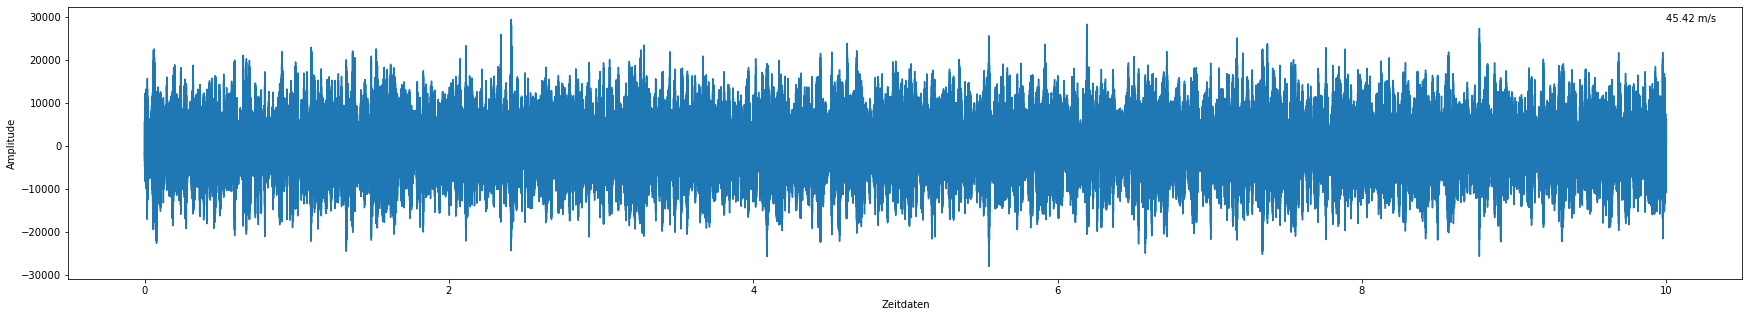

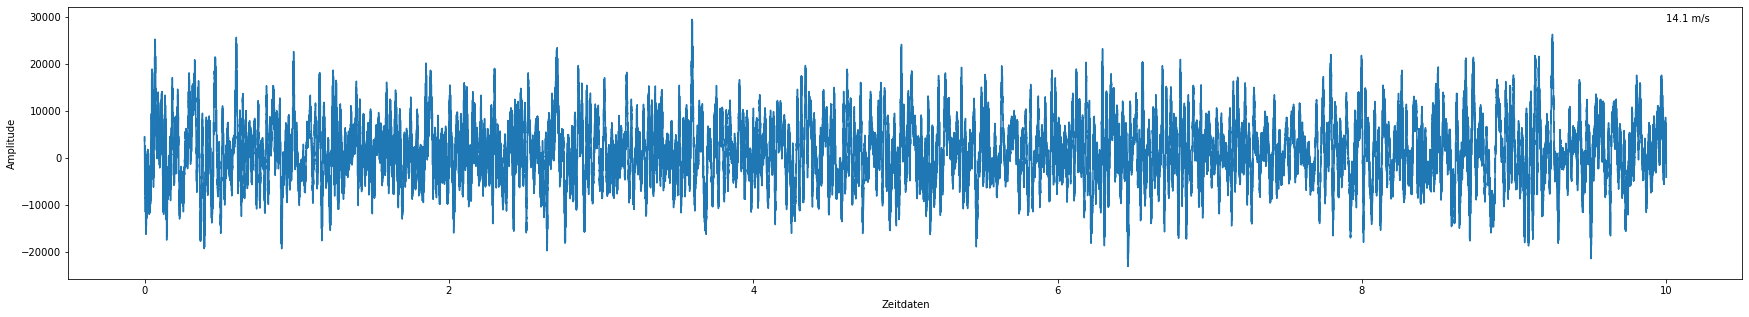

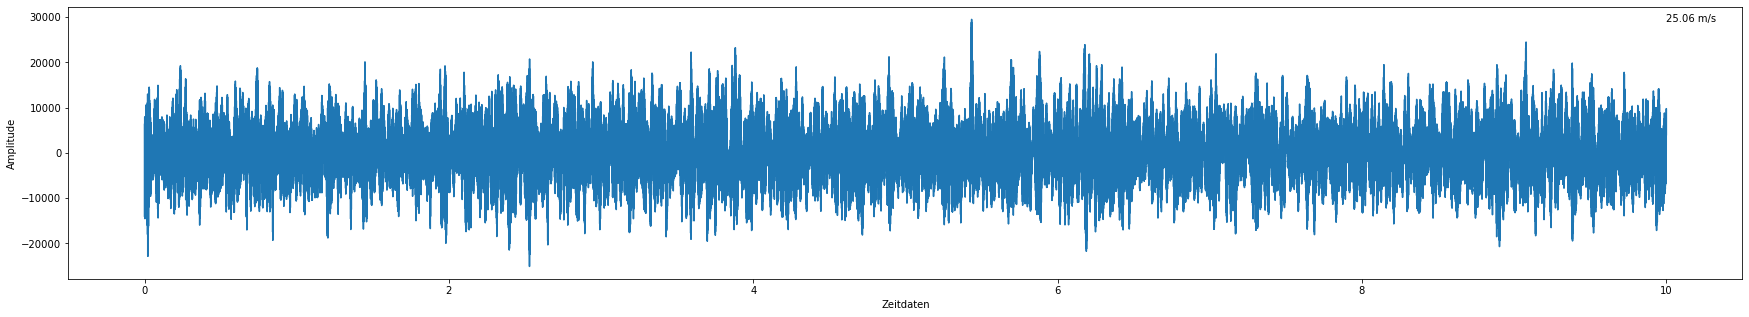

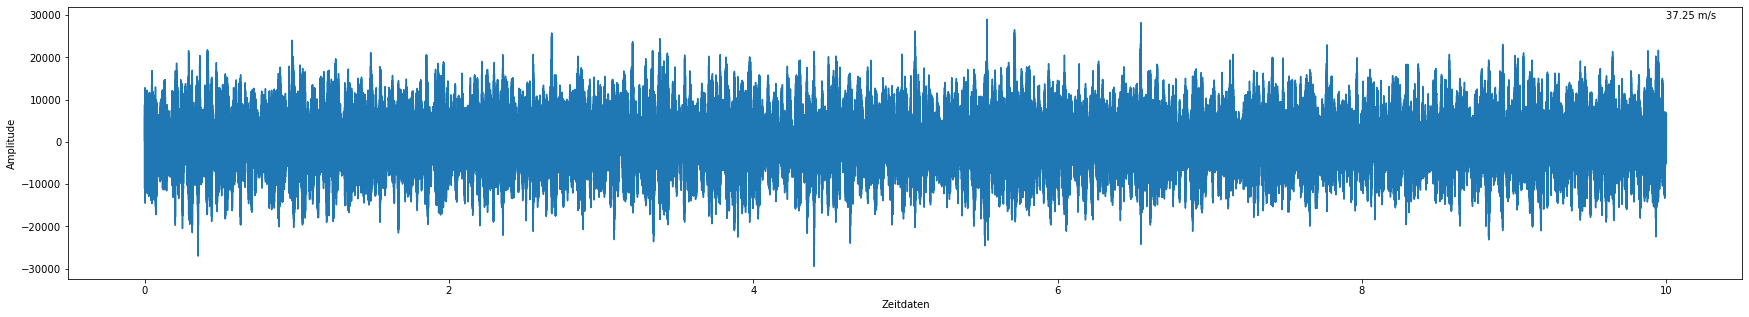

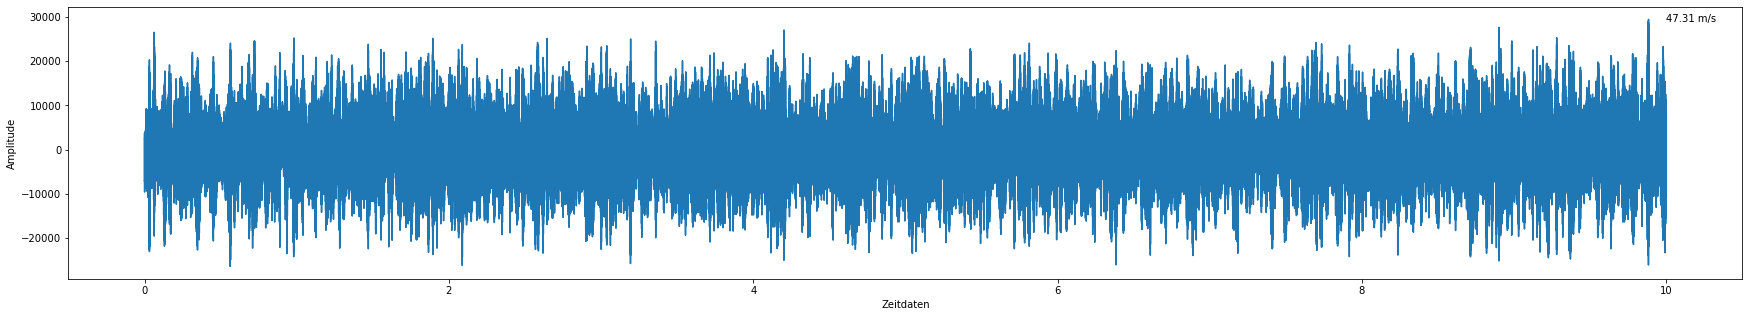

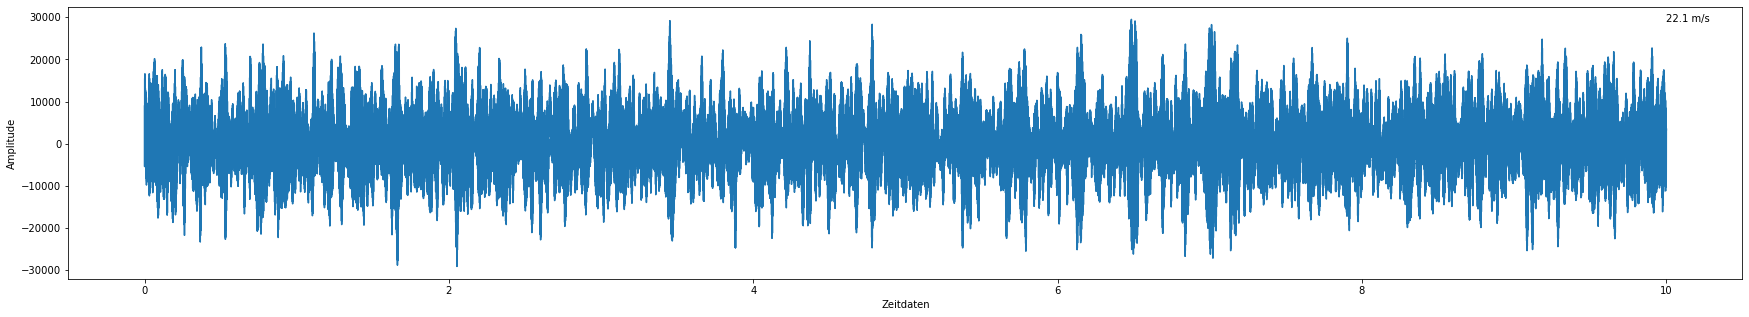

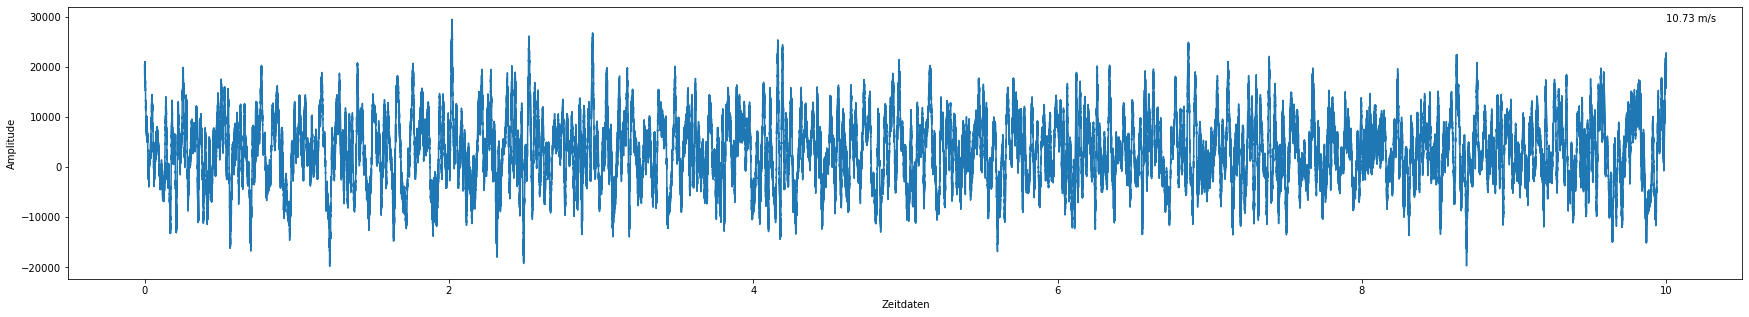

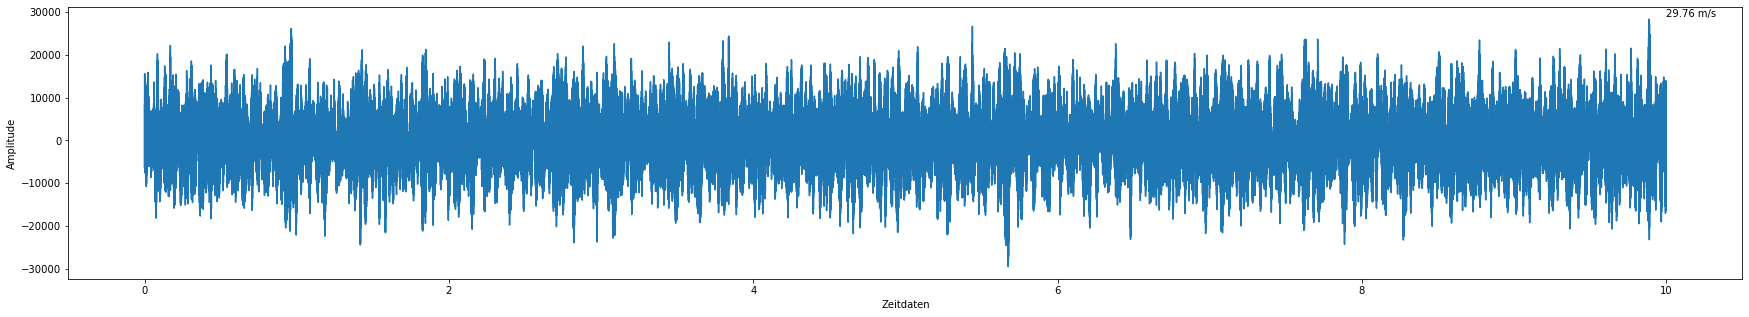

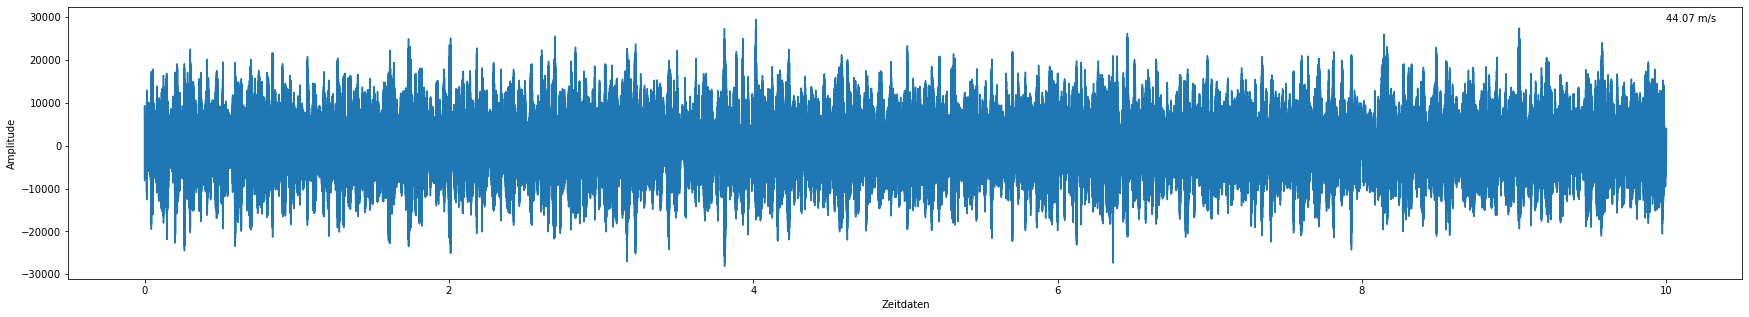

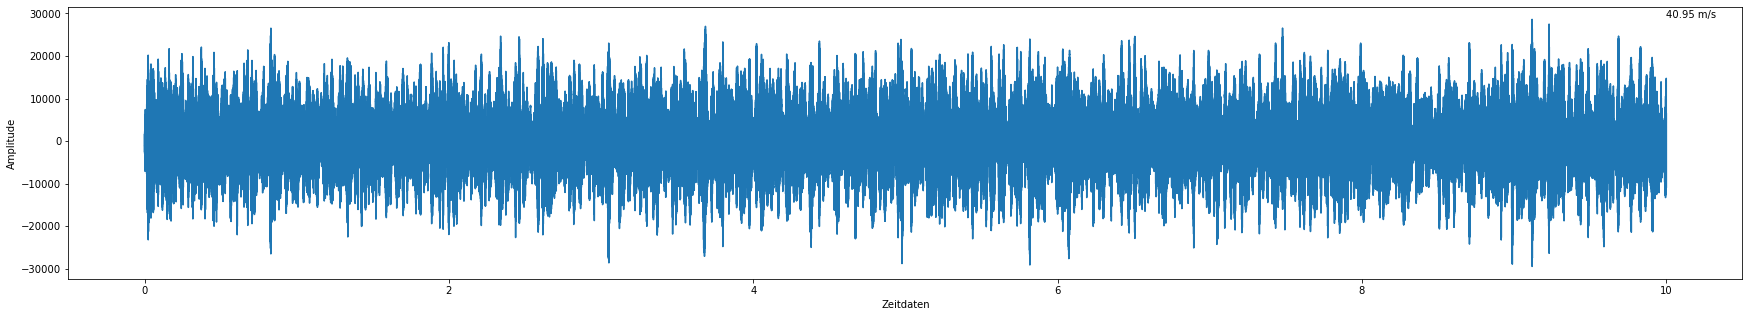

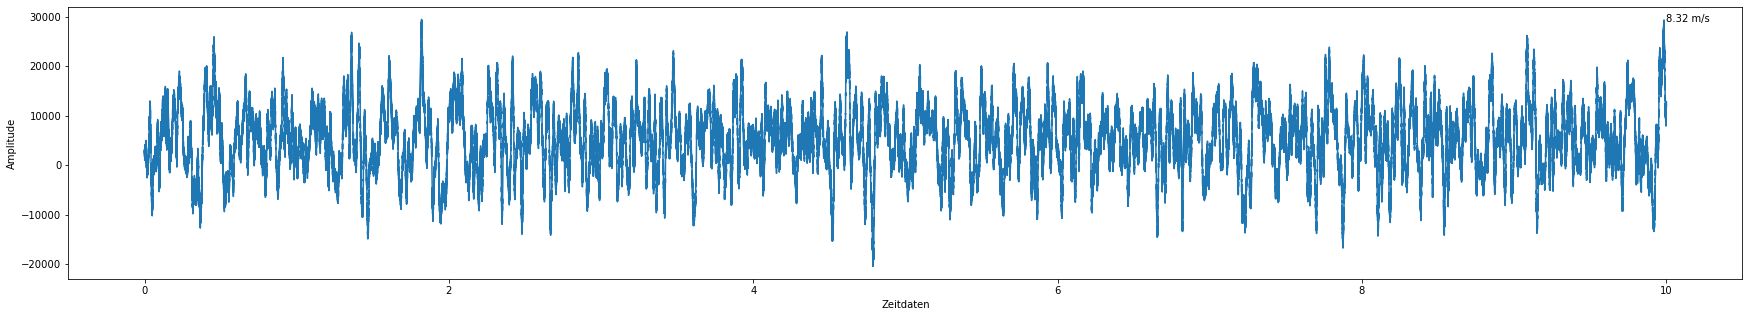

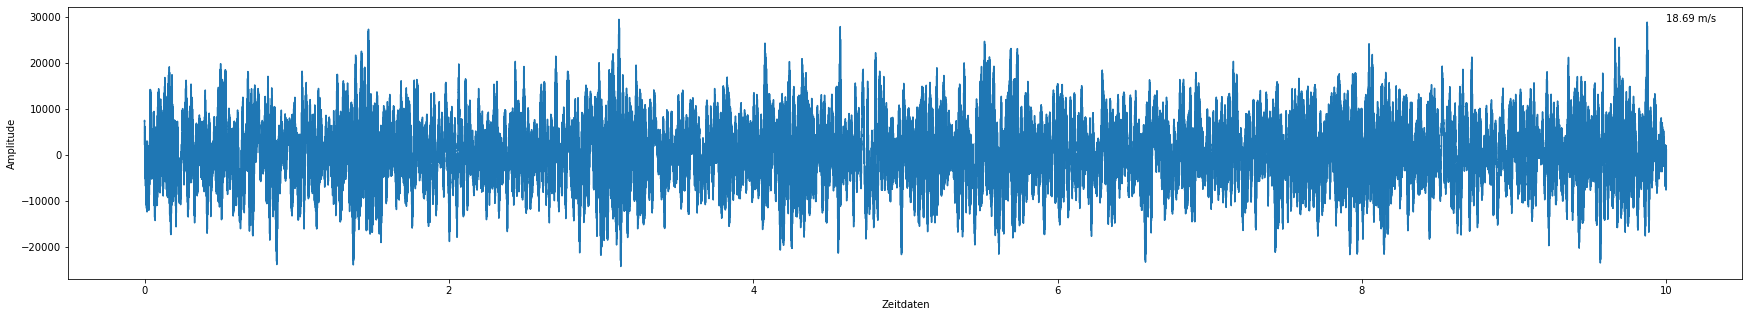

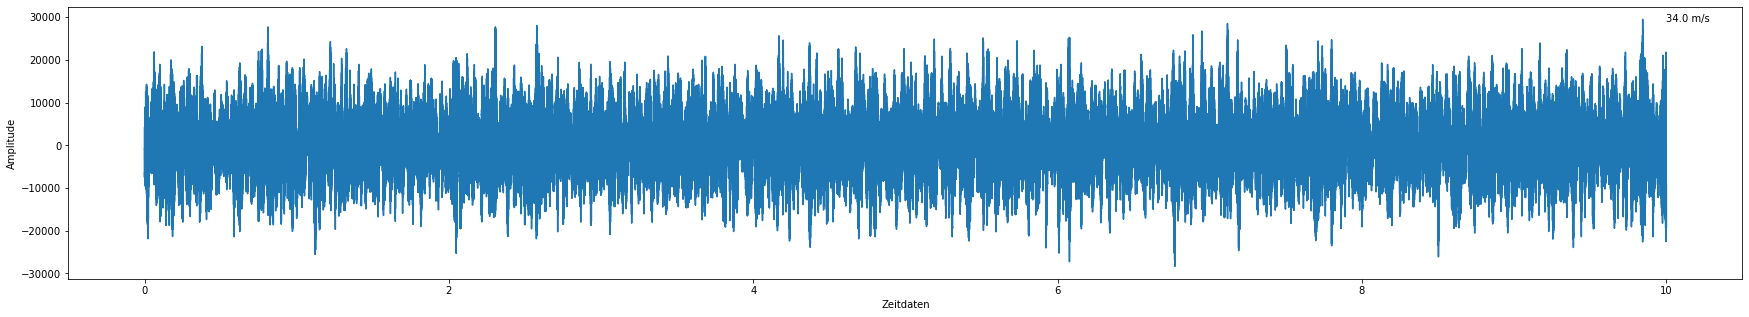

In [15]:
# Hier eigenen Code schreiben ...
import numpy as np 
import matplotlib.pyplot as plt 
zeit = np.arange(0, 10, 10/len(file_list[1]))
for index in range(len(file_list)): 
    audio = file_list[index]
    plt.figure(figsize = (30,5))
    plt.xlabel('Zeitdaten') 
    plt.ylabel('Amplitude') 
    plt.plot(zeit,audio) 
    plt.text(10, 29000, str(vlist[index]) + " m/s")
    plt.show()



Um aus den Zeitdaten $p(t)$ Informationen über die darin enthaltenen Töne zu ermitteln, ist es sinnvoll, aus den Datensätzen jeweils ein Spektrum $p(f)$ zu berechnen. 
Dies geschieht allgemein über eine [Fourier-Transformation](https://de.wikipedia.org/wiki/Fourier-Transformation) bzw. für diskret abgetastete Werte mittels einer [Diskreten Fourier-Transformation](https://de.wikipedia.org/wiki/Diskrete_Fourier-Transformation) (DFT). Für reellwertige Signale ist diese z.B. im Modul [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) mit der Funktion [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html) implementiert.

### 2) Hiebton

**2.1) Berechnen Sie die Spektren (Amplitudenquadrat über Frequenz) aller Zeitsignale und stellen Sie sie in einem gemeinsamen Diagramm dar:**

  * Berechnen Sie das Betragsquadrat $|p(f)|^2$ für die einzelnen Werte.
  * Stellen Sie diese nur für Frequenzen [bis](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz dar. Beschriften Sie die x-Achse korrekt.
  * Um den ggf. verdeckten Verlauf einiger Spektren sichtbar zu machen, setzen Sie den Parameter *alpha* der Plotfunktion auf einen Wert kleiner als 1.
  * Wählen Sie eine ausreichende Größe der Abbildung.
  * Stellen Sie die y-Achse mit logarithmischer Skalierung dar.
  * Fügen Sie der Abbildung eine Legende hinzu, damit die jeweiligen Spektren zuordenbar sind.
  
_Hinweis: Die zugehörigen Frequenzen lassen sich mithilfe der Funktion [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html) berechnen. 
Anzahl der Samples sowie Abtastrate sind bereits aus Aufgabenteil 1 bekannt._

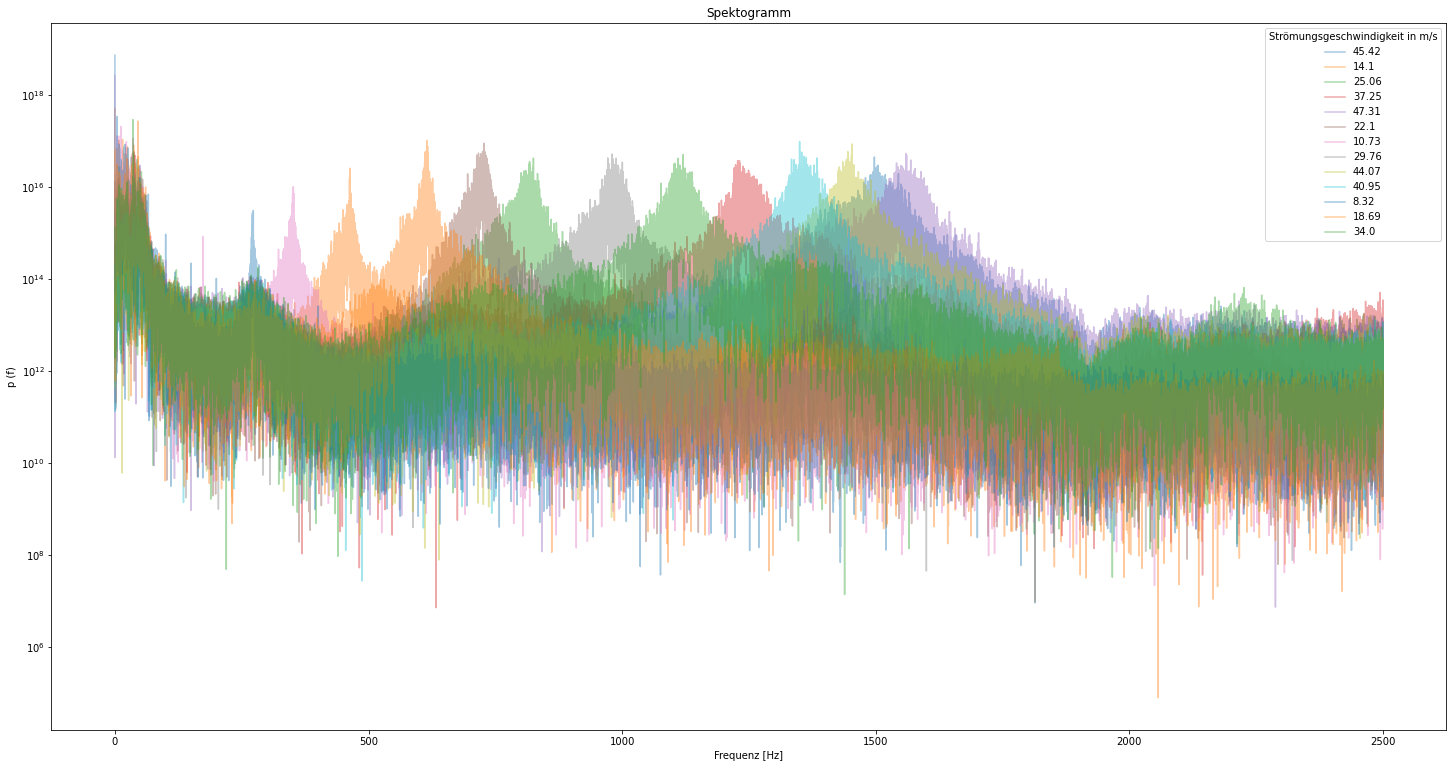

In [18]:
from numpy.fft import rfftfreq
plt.figure(figsize = (25,13)) # Größe der Abbildung festlegen

for i in range(len(file_list)):
    # Fourier-Transformation:
    spek = np.fft.rfft(file_list[i]) # Daten zu Spektrum (p(t) zu p(f))
    freq = np.fft.rfftfreq(len(file_list[i]), d = 1/samplerate) # Ermittlung der zugehörigen Frequenz
    
    #Obergrenze von 2500 Hz festlegen:
    og = np.searchsorted(freq, 2500) # Suchen nach Index, wo der Wert kleiner gleich 2500 Hz ist
    
    #Plotten:
    betragsquadrat = (abs(spek[:og]))**2 # Berechnung des Betragsquadrats für Spektrum p(f) für den betrachteten Bereich unter Obergrenze og
    plt.plot(freq[:og], betragsquadrat, alpha = 0.4, label = vlist[i])

# Ausgabe der Grafik:
plt.xlabel("Frequenz [Hz]")
plt.ylabel("p (f)")
plt.title("Spektogramm")
plt.legend(loc = "upper right", ncol = 1, title = "Strömungsgeschwindigkeit in m/s")
plt.yscale("log")
plt.show()

**2.2) Finden Sie für jede Strömungsgeschwindigkeit den jeweils markanten Ton (d.h. den Maximalwert im Spektrum).**
  * Vernachlässigen Sie in Ihrer Betrachtung Frequenzen unter 100 Hz.
  * Geben Sie die charakteristische Frequenz $f$ für jede Geschwindigkeit $v$ in übersichtlicher Form aus, z.B.: `v:  0.00 m/s,    f:    0.0 Hz`

In [19]:
freq_list = [] # Frequenzliste für die nächste Aufgabe
for i in range(len(file_list)):
    # Fourier-Transformation wie in 2.1):
    spek = np.fft.rfft(file_list[i])
    betragsquadrat = abs(spek)**2
    freq = np.fft.rfftfreq(len(file_list[i]), d = 1/samplerate)
    
    # Ober- und Untergrenze festlegen:
    og = np.searchsorted(freq, 2500)
    ug = np.searchsorted(freq, 100)
    
    # Maximale Frequenz bestimmen für markanten Ton:
    max_index = np.argmax(betragsquadrat[ug:og]) + ug # Maximum im SPektrum innerhalb der festgelegten Grenzen
    mfreq = freq[max_index] # Frequenz des Maximums Verschoben um 100
    freq_list.append(mfreq)
    
    # Ausgabe der Werte:
    print(f"v: {vlist[i]:5.2f} m/s, \tf: {mfreq:6.1f} Hz")

v: 45.42 m/s, 	f: 1497.1 Hz
v: 14.10 m/s, 	f:  463.0 Hz
v: 25.06 m/s, 	f:  825.0 Hz
v: 37.25 m/s, 	f: 1227.6 Hz
v: 47.31 m/s, 	f: 1559.2 Hz
v: 22.10 m/s, 	f:  727.2 Hz
v: 10.73 m/s, 	f:  351.7 Hz
v: 29.76 m/s, 	f:  980.2 Hz
v: 44.07 m/s, 	f: 1452.6 Hz
v: 40.95 m/s, 	f: 1349.7 Hz
v:  8.32 m/s, 	f:  272.8 Hz
v: 18.69 m/s, 	f:  614.7 Hz
v: 34.00 m/s, 	f: 1120.1 Hz


### 3) Modellbildung

Es soll angenommmen werden, dass ein annähernd linearer Zusammenhang der beiden Größen $v$ und $f$ besteht. 
Um diesen zu ermitteln, soll daher eine [Regressionsgerade](https://de.wikipedia.org/wiki/Lineare_Einfachregression) berechnet werden.
Eine Gerade im zweidimensionalen Raum ist definiert durch 2 Parameter $a, b$:
$$
f = a\,v + b
$$

Die Koeffizienten $a$ und $b$ der Regressionsgerade berechnen sich über:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

**3.1) Schreiben Sie eine Funktion _ab()_, die für beliebige, gleich lange Arrays _v_ und _f_ die Geraden-Parameter _a_ und _b_ berechnet und zurückgibt.**

In [20]:
def ab(v,f):
    mittelwert_v = np.mean(v) # Berechnung von dem Mittelwert von v
    mittelwert_f = np.mean(f) # Berechnung von dem Mittelwert von f
    a = (np.sum((v-mittelwert_v)*(f-mittelwert_f))) / (np.sum((v-mittelwert_v)**2)) # Berechnung von dem Parameter a
    b = mittelwert_f - (a * mittelwert_v) # Berechnung von dem Parameter b
    return a,b

In [21]:
# Hier ist ein Plausibilitätstest:
import numpy as np
assert ab(np.array([1,2]),np.array([0,1])) == (1.,-1.), 'ab-Funktion'

**3.2) Wenden Sie die Funktion auf die Wertepaare aus Aufgabenteil 2.2 an und zeichnen Sie die Regressionsgerade (als Linie) zusammen mit den Ausgangswerten (als Punkte) in ein Diagramm.**

  * Achten Sie auf korrekte Achsenbeschriftungen.
  * Geben Sie außerdem an, welche charakteristischen Töne bei $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$ und $v=50\,\frac{\text{m}}{\text{s}}$ zu erwarten wären.
  * Zeichnen Sie die Abweichung der gemessenen Werte zur Regressionsgerade in ein separates Diagramm.
  * Wie groß sind Mittelwert und Standardabweichung dieser Abweichungen?

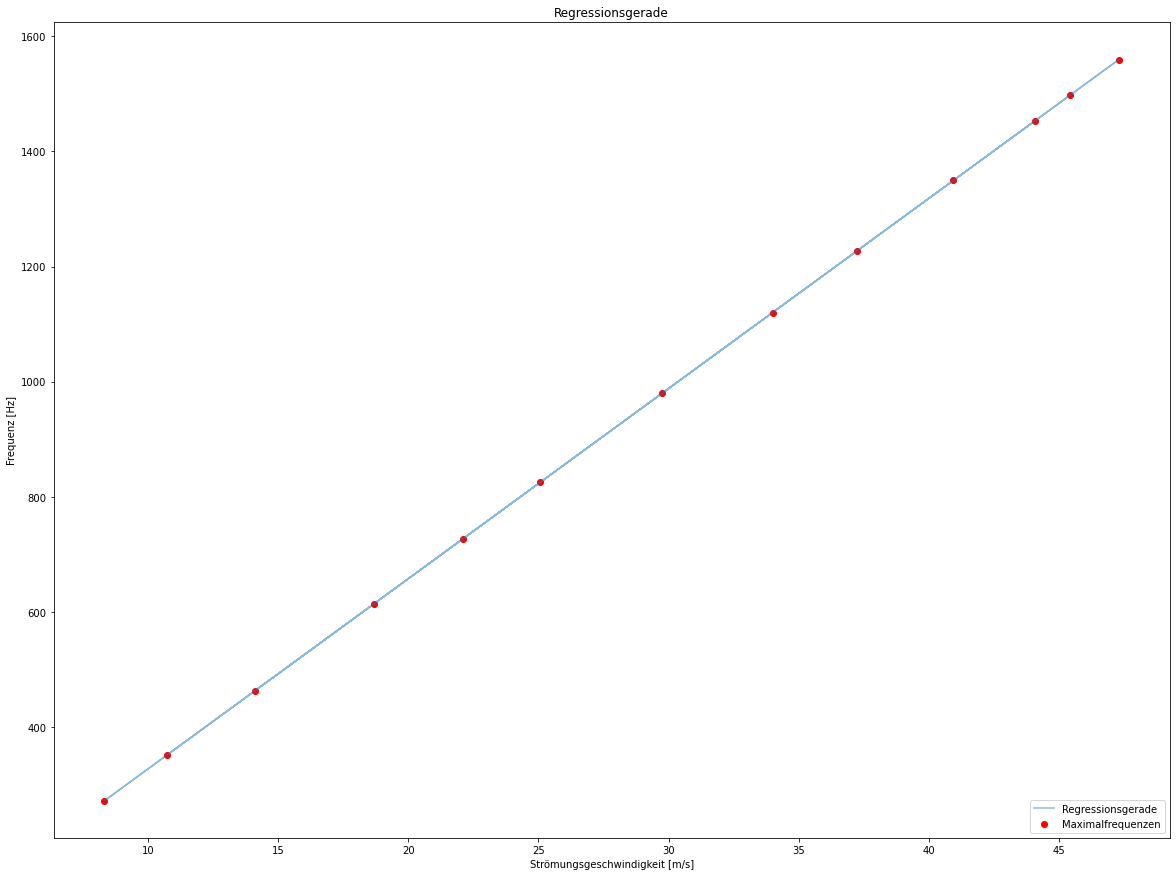

Erwartungswert bei 15 m/s:  492.92 Hz
Erwartungswert bei 42 m/s: 1384.20 Hz
Erwartungswert bei 50 m/s: 1648.28 Hz


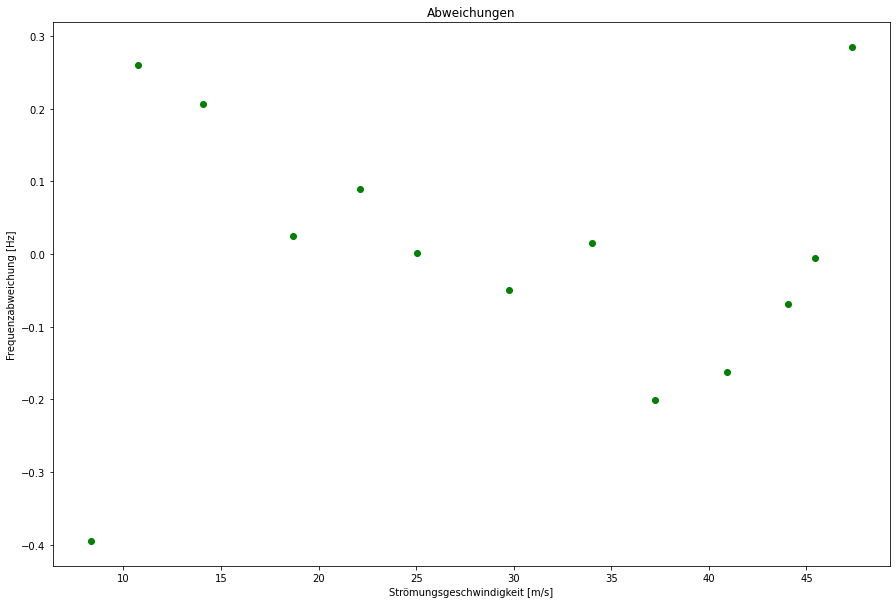

Mittelwert der Frequenzabweichungen: 1.6178511521922282e-13 Hz
Standardabweichung der Frequenzabweichung: 0.1818770897661319 Hz


In [22]:
# Diagramm mit Ausgangswerten und Regressionsgeraden:
parameter_a, parameter_b = ab(vlist, freq_list) # Anwendung der Funktion aus 3.1 zur Berechnung der Parameter
array_freq_toplot = [] # Erstellen einer Liste für die Frequenzwerten der Regressionsgeraden
for index_1 in range(len(vlist)):
    item = float(parameter_a) * vlist[index_1] + float(parameter_b)
    array_freq_toplot.append(item)
plt.figure(figsize = (20,15))
plt.plot(vlist, array_freq_toplot, alpha = 0.5, label = "Regressionsgerade")
plt.scatter(vlist, freq_list, c = "red", label = "Maximalfrequenzen")
plt.xlabel("Strömungsgeschwindigkeit [m/s]")
plt.ylabel("Frequenz [Hz]")
plt.title("Regressionsgerade")
plt.legend(loc = "lower right", ncol = 1)
plt.show()

# Erwartete charakteristische Töne für gegebene Geschwindigkeiten:
vlist_new = [float('15'),float('42'),float('50')]
array_freq_toplot_new = []
for index_2 in range(len(vlist_new)):
    item_new = round(float(parameter_a) * vlist_new[index_2] + float(parameter_b) , 2) 
    array_freq_toplot_new.append(item_new)
    print(f"Erwartungswert bei {vlist_new[index_2]:.0f} m/s: {item_new:7.2f} Hz")

# Diagramm für Abweichungen zwischen Augangswerten und Regressionsgeraden:
freq_abweichung = np.array(array_freq_toplot) - np.array(freq_list) # Differenz aus Ausgangswerten und den jeweiligen Werten der Regressionsgeraden
plt.figure(figsize = (15,10))
plt.scatter(vlist, freq_abweichung, c = "green")
plt.xlabel("Strömungsgeschwindigkeit [m/s]")
plt.ylabel("Frequenzabweichung [Hz]")
plt.title("Abweichungen")
plt.show()

# Berechnung Mittelwert und Standardabweichung der Abweichungen:
mw_freq_abweichung = np.mean(freq_abweichung)
std_freq_abweichung = np.std(freq_abweichung)
print(f"Mittelwert der Frequenzabweichungen: {mw_freq_abweichung} Hz")
print(f"Standardabweichung der Frequenzabweichung: {std_freq_abweichung} Hz")